In [3]:
# Importing our libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
from pandas import Series, DataFrame
%matplotlib inline


In [4]:
# Reading our dataset
dataset = pd.read_excel('C:\ΑΠΟΣΤΟΛΗΣ\ΑΠΟΣΤΟΛΗΣ\BET\LIVE1STHALF.xlsx')


In [5]:
# Our goal is to explore the possibility of placing live bets , during the first half of  a 
# football game, and particularly after the 35th minute.In other words we want to predict 
# a late first half goal. But first let's explore our data
dataset.head()

,Handicap,GL,HAT_GL,ODD32,OD37,OD38,ODD39,ODD40,Drop1,Drop2,...,SofH39,SofH40,SofA28,SofA32,SofA36,SofA37,SofA38,SofA39,SofA40,synsotont40
0,3.50,9.50,4.25,0,0.00,0.00,0.00,0.00,1,1,...,0,0,0,0,0,0,0,0,0,10
1,4.50,9.50,4.00,0,0.00,0.00,0.00,0.00,2,2,...,0,0,0,0,0,0,0,0,0,11
2,4.50,9.50,4.00,0,0.00,0.00,0.00,0.00,0,0,...,0,0,0,0,0,0,0,0,0,8
3,-7.75,8.75,3.75,2.05,1.75,1.85,2.05,2.25,20,23,...,7,7,0,0,0,0,0,0,0,11
4,0.50,8.50,3.50,0,0.00,0.00,0.00,0.00,0,0,...,0,0,0,0,0,0,0,0,0,10


In [6]:
dataset = dataset.drop_duplicates()

In [7]:
dataset.isnull().sum()

Handicap           0
GL                 0
HAT_GL             0
ODD32              0
OD37               0
OD38               0
ODD39              0
ODD40              0
Drop1              0
Drop2              0
ODD82              0
ODD87              0
NEWHNDCP           0
ODD40ROUNDED       0
H37                0
A37                0
G37             1165
H38                0
A38                0
G38              704
H39                0
A39                0
G39              393
H40                0
A40                0
G40                0
DH32               0
Dh36               0
DH37               0
DH38               0
                ... 
DA40               0
SoTH28             0
SoTH32             0
SoTH36             0
SoTH37             0
SoTH38             0
SoTH39             0
SoTH40             0
SoTA28             0
SoTA32             0
SoTA36             0
SoTA37             0
SoTA38             0
SoTA39             0
SoTA40             0
SofH28             0
SofH32       

In [8]:
# We will drop the rows with missing values in particular columns that we detected that are problematic
dataset.dropna(subset = ['HAT_GL','NEWHNDCP','ODD40ROUNDED', 'G37', 'G38' , 'G39'] , inplace = True)


In [9]:
# Let's verify
dataset.isnull().sum()

Handicap        0
GL              0
HAT_GL          0
ODD32           0
OD37            0
OD38            0
ODD39           0
ODD40           0
Drop1           0
Drop2           0
ODD82           0
ODD87           0
NEWHNDCP        0
ODD40ROUNDED    0
H37             0
A37             0
G37             0
H38             0
A38             0
G38             0
H39             0
A39             0
G39             0
H40             0
A40             0
G40             0
DH32            0
Dh36            0
DH37            0
DH38            0
               ..
DA40            0
SoTH28          0
SoTH32          0
SoTH36          0
SoTH37          0
SoTH38          0
SoTH39          0
SoTH40          0
SoTA28          0
SoTA32          0
SoTA36          0
SoTA37          0
SoTA38          0
SoTA39          0
SoTA40          0
SofH28          0
SofH32          0
SofH36          0
SofH37          0
SofH38          0
SofH39          0
SofH40          0
SofA28          0
SofA32          0
SofA36    

In [10]:
# Now, we create a column with the sum of goals scored at the 37th mimute. H37 is Home goals at 37th minute, A37 
# stands for Away goals at 37th minute. Respectively, H38 , A38 for the 38th minute, etc
dataset['goalssum37'] = dataset['H37'] + dataset['A37']
dataset['goalssum38'] = dataset['H38'] + dataset['A38']
dataset['goalssum39'] = dataset['H39'] + dataset['A39']
dataset['goalssum40'] = dataset['H40'] + dataset['A40']

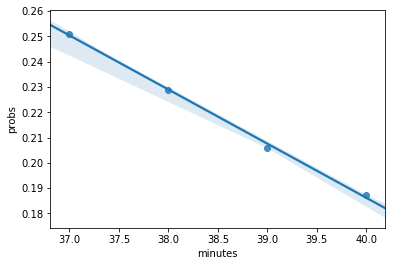

In [11]:
# We will verify the "obvious". As we proceed to the end of the half time, no matter what the score is, the probability of 
# a goal being scored decreases(???) prob37 is the probability of a goal between 37th minute and the end of 1st half. 
# Respectively we construct prob38, prob39 and prob40. G37, G37,G39, G40 has a value of 1, if indeed a goal was scored, 
# and a 0 if not.

prob37 = dataset['G37'].mean()
prob38 = dataset['G38'].mean()
prob39 = dataset['G39'].mean()
prob40 = dataset['G40'].mean()

probs = [prob37,prob38,prob39,prob40]
minutes = [37,38,39,40]

probsdf = DataFrame()
probsdf['minutes'] = minutes
probsdf['probs'] = probs
sb.regplot(x= 'minutes' , y = 'probs' , data = probsdf)


In [12]:
# There seems to be a strong negative correlation.  Let's confirm it
from scipy.stats.stats  import pearsonr
pearsonr(probsdf['minutes'] , probsdf['probs'])


(-0.99881233524921209, 0.0011876647507879092)

In [ ]:
# pearson r = -0.99  and p-value = 0.0012, so indeed, as we come closer to the end of the 1st half, the probability of a goal 
# scored, decreases substantially

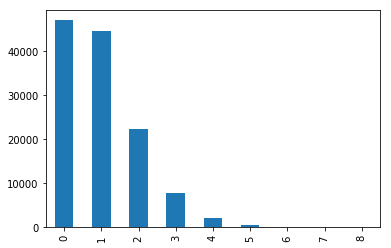

In [13]:
# Of course, the probability should change , depending on the exelixis of the match so far. 
# We will create a pivot table to detect  the probabibility for all the scores at 37th minute
# But first let's see the frequency of the sum of goals at 37th minute
dataset['goalssum37'].value_counts().plot(kind = 'bar')

In [14]:
# As we can see, 4+ goals is very rare. Let's make  subset, that contains only 3 goals or less
subset37 = dataset[dataset['goalssum37'] <= 3]

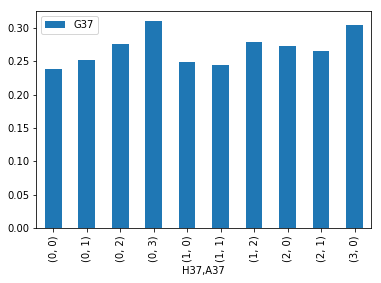

In [15]:
# For every possible score at the 37th  minute, we will get the probability of a goal scored 
# till the end of 1st half.We will use a pivot table.
subset37.pivot_table(index = ['H37', 'A37'] , values = 'G37').plot(kind = 'bar')

C:\Users\tolaros\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


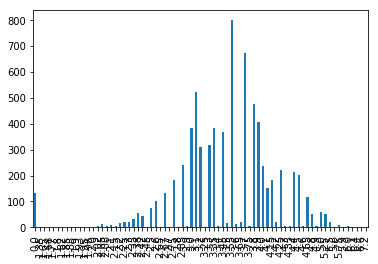

In [16]:
# It would be fair to say that, for instance, if the score is 2-0 at 37th minute
#(the prob of a goal being scored is 27.7%), if the offered odd is greater than 1/0.277 = 3.6,
# then I should place a bet. But what about the offered odds, at 37th minute? Let us see the 
# distribution. The'OD37' column, contains the odds we are interested in. twonil is a subset, 
# where the score at the 37th minute is 2-0
twonil = subset37[subset37['H37'] == 2][subset37['A37'] == 0]
twonil['OD37'].value_counts().sort_index().plot(kind = 'bar')

In [24]:
# Not so well defined, because we have many different odds at 37th minute.Nevertheless we could say that it reminds somehow 
# of a normal distribution. The mean odd is
twonil['OD37'].mean()

3.485924528301974

In [26]:
# Maybe we have a chance, because the mean odd is very close to the fair odd. Let's calculate our ROI, 
# assuming that we bet 1 euro at each game that  is 2-0 at 37th minute, and the offered odd is equal 
# or greater than 3.6
twonilfairodds = twonil[twonil['OD37'] >3.59]

# If agoal IS scored, the G37 column has a value of 1.If no goal is scored then G37 has a value of 0. So I will
# make a new column,named profit, multiplying G37 with the offered odd. The sum of this column, will be the 
# money returned to us.
twonilfairodds['profit'] = twonilfairodds['G37'] * twonilfairodds['OD37']
ROI = (twonilfairodds['profit'].sum() / len(twonilfairodds['profit'])) -1 
print(ROI) # So close but negative

-0.022662889518410112


C:\Users\tolaros\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [27]:
# Next, let us try something difficult. Imagine a game that is  0-0  at the 40th minute. Which factors
# could be critical for the prognosis of a goal being scored? Info from the bookies? In play stats?
# BOTH?

# Construction of a subset neilneil40
neilneil40 = dataset[dataset['H40'] == 0][dataset['A40'] == 0]

C:\Users\tolaros\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


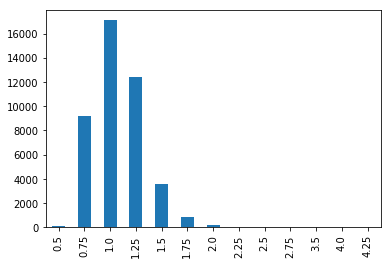

In [28]:
# let's start with what the bookmaker has to offer. HAT_GL is  the asian half time goal line. 
# Usually the greater it is, the more possible it is that there will be goals in the 1st half 
neilneil40['HAT_GL'].value_counts().sort_index().plot(kind = 'bar')

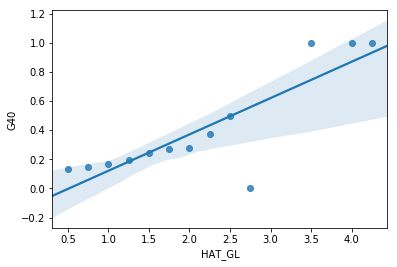

In [29]:
# Let's see a graph of the probability of a goal scored and each HAT_GL price
pv40 = neilneil40.pivot_table(index = 'HAT_GL' , values = 'G40')
pv40['HAT_GL'] = pv40.index
sb.regplot(x= 'HAT_GL' , y = 'G40' , data = pv40 )

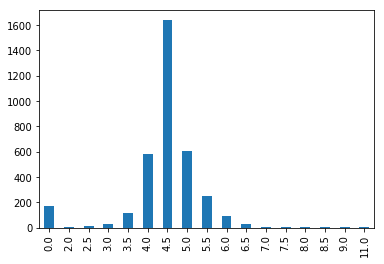

In [31]:
# WE detect a positive correlation, but remember EVERYTHING is a matter of value. For example, 
# if HAT_GL = 1.5 ,there is a 24.32 %( fair odd 4.11)  chance that a goal will be scored. But, 
# what is the odd offered,  for this circumstance? Let us see
neilneil40test = neilneil40[neilneil40['HAT_GL'] == 1.5]
# the 'ODD40ROUNDED' column, contains the odds at 40th minute, with a 0.5 step (3,3.5,4,4.5,etc)
neilneil40test['ODD40ROUNDED'].value_counts().sort_index().plot(kind = 'bar')



In [34]:
# We can assume that maybe there is a chance, because the majority of the offered odds is around 4.5
# a little bit greater than the fair odd. We will create a subset, where the odds are at least 4.5
fairodds = neilneil40test[neilneil40test['ODD40ROUNDED'] >4.49]
# If agoal IS scored, the G40 column has a value of 1. So I will make a new column, multiplying
# G40 with the offered odd. The sum of this column, will be the money returned to us.
fairodds['profit'] = fairodds['G40'] * fairodds['ODD40ROUNDED']
ROI = (fairodds['profit'].sum() / len(fairodds['profit'])) -1 
print(ROI)



0.016881638846737435


C:\Users\tolaros\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


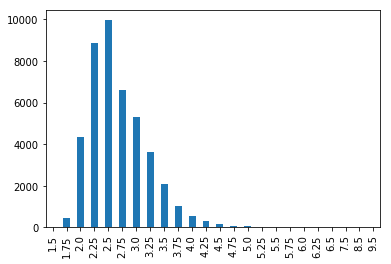

In [35]:
# Now we will do the same for the GL column. This is the asian handicap for the 90 minutes sum of goals
# Again the greater it is , more goals will probably be scored
neilneil40['GL'].value_counts().sort_index().plot(kind = 'bar')

(0.77822922376353709, 7.5573886688966494e-06)

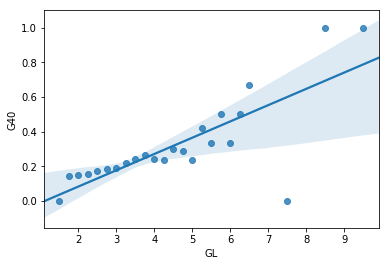

In [36]:
# Let's see a graph of the probability and each GL price
pvGL = neilneil40.pivot_table(index = 'GL' , values = 'G40')
pvGL['GL'] = pvGL.index
sb.regplot(x= 'GL' , y = 'G40' , data = pvGL ) # positive and strong correlation, again we can see that the bookies know better
pearsonr(pvGL['GL'], pvGL['G40'])

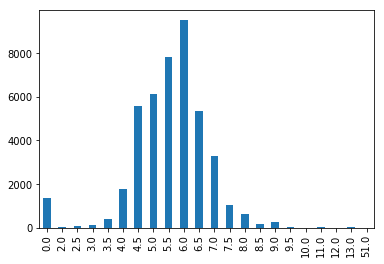

In [37]:
# We will do all of the above for the ODD40ROUNDED column. We have the odds at 40th minute, 
# rounded at 0.5 level.
neilneil40['ODD40ROUNDED'].value_counts().sort_index().plot(kind = 'bar')

In [38]:
# We will narrow the prices of 'ODD40ROUNDED' between 4 and 8
narrowed = neilneil40[neilneil40['ODD40ROUNDED'] < 8][neilneil40['ODD40ROUNDED']  >3.99]

C:\Users\tolaros\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


(-0.92095555187190814, 0.0011626404218594961)

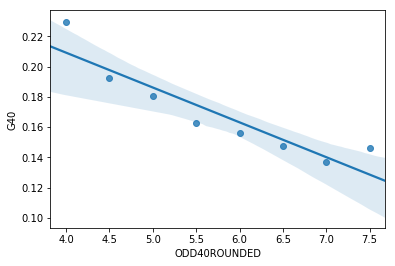

In [39]:
# Let's see a graph of the probability and each ODD40ROUNDED price
pvODD = narrowed.pivot_table(index = 'ODD40ROUNDED' , values = 'G40')
pvODD['ODD40ROUNDED'] = pvODD.index
sb.regplot(x= 'ODD40ROUNDED' , y = 'G40' , data = pvODD ) 
pearsonr(pvODD['ODD40ROUNDED'], pvODD['G40'])  # strong negative correlation, as expected

In [40]:
# Next, I want to investigate a simple belief. Does the probability of a goal being scored increase,
# while the totalshots made by the two teams increase? I will create a new column, totshoton, meaning total shots on target
neilneil40['totshoton'] = neilneil40['SoTH40'] + neilneil40['SoTA40']

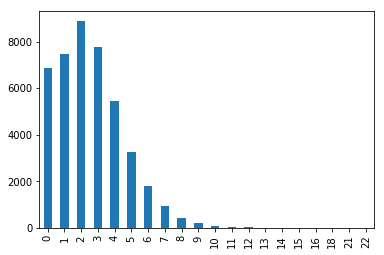

In [41]:
# Exploration of totshoton
neilneil40['totshoton'].value_counts().sort_index().plot(kind = 'bar')

(0.96864836790534248, 1.7423485941491753e-05)

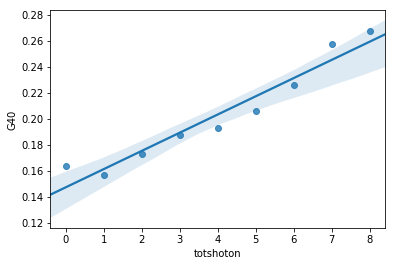

In [42]:
# We will drop all games that have more than 8 shots on target, because they have very very low frequency. After that, we consy=truct a pivot table
# to comment on the prob of goal scored and the total shots on target
subset = neilneil40[neilneil40['totshoton'] < 9]
pvshon = subset.pivot_table(index = 'totshoton' , values = 'G40')
pvshon['totshoton'] = pvshon.index
sb.regplot(x= 'totshoton' , y = 'G40' , data = pvshon ) 
pearsonr(pvshon['totshoton'], pvshon['G40']) # very strong correlation

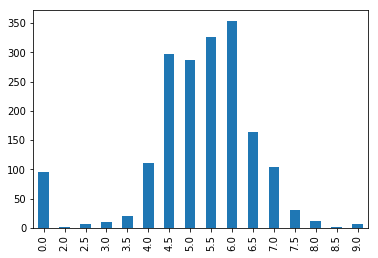

In [43]:
# Exploration of subset2, where totshoton = 6 and probability is 22.56 %,meaning a fair odd would be 4.43
subset2 = subset[subset['totshoton'] == 6]
subset2['ODD40ROUNDED'].mean()
subset2['ODD40ROUNDED'].value_counts().sort_index().plot(kind = 'bar')

In [45]:
# The majority of the offerd odds are between 4.5 and 6.5, with a mean value of 5.16, which is above fair
# Let us now evaluate the ROI, if we placed a bet on each game with an odd greater or equal to 4.5
fairodds2 = subset2[subset2['ODD40ROUNDED'] >4.49]
fairodds2['profit'] = fairodds2['G40'] * fairodds2['ODD40ROUNDED']
ROI = (fairodds2['profit'].sum() / len(fairodds2['profit'])) -1 
print(ROI)# 8% ROI

0.08438685208596719


C:\Users\tolaros\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
